In [6]:
from tensorflow.keras import layers, Model
from tensorflow.python.client import device_lib
# Encoder
input_img = layers.Input(shape=(64, 64, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2))(x)

num_styles = 100
# Style Embedding
style_input = layers.Input(shape=(num_styles,))
style_embedding = layers.Dense(128, activation='relu')(style_input)

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

# 모델 생성
model = Model([input_img, style_input], decoded)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import cv2
input_path = "/Users/kimeunsur/2024winter/4주차/font_ai_model/font_images/nanumgothic"
target_path = "/Users/kimeunsur/2024winter/4주차/font_ai_model/font_images/nanumpen"

# 데이터 로드 함수
def load_images(image_dir, target_size=(64, 64)):
    images = []
    file_names = sorted(os.listdir(image_dir))  # 정렬하여 파일 순서를 맞춤
    for file_name in file_names:
        if file_name.endswith(".png"):
            img = cv2.imread(os.path.join(image_dir, file_name), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, target_size)  # 크기 조정
            images.append(img)
    return np.array(images)

# 입력(고딕체) 데이터와 타겟 데이터 로드
X_gothic = load_images(input_path)  # 고딕체 이미지
Y_target = load_images(target_path)  # 타겟 스타일 이미지

# 데이터 정규화 (픽셀 값을 [0, 1]로 스케일링)
X_gothic = X_gothic / 255.0
Y_target = Y_target / 255.0

# 차원 추가 (64x64 -> 64x64x1)
X_gothic = np.expand_dims(X_gothic, axis=-1)
Y_target = np.expand_dims(Y_target, axis=-1)

FileNotFoundError: [Errno 2] No such file or directory: '../font_images/target'

In [3]:
# 모델 학습
history = model.fit(
    [X_gothic, style_one_hot],  # 입력: 고딕체 이미지와 스타일 정보
    Y_target,                   # 출력: 타겟 폰트 이미지
    validation_split=0.2,       # 검증 데이터 비율
    epochs=50,                  # 학습 반복 횟수
    batch_size=32               # 배치 크기
)

Epoch 1/50


/Users/kimeunsur/yes/envs/newenv/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_5']. Received: the structure of inputs=('*', '*')
  warnings.warn(
2025-01-17 15:19:52.414650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 417ms/step - accuracy: 0.0000e+00 - loss: 0.1616 - val_accuracy: 0.0000e+00 - val_loss: 3.3529e-05
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.0000e+00 - loss: 1.7995e-05 - val_accuracy: 0.0000e+00 - val_loss: 6.7418e-06
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 389ms/step - accuracy: 0.0000e+00 - loss: 6.5448e-06 - val_accuracy: 0.0000e+00 - val_loss: 6.2312e-06
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 386ms/step - accuracy: 0.0000e+00 - loss: 6.2131e-06 - val_accuracy: 0.0000e+00 - val_loss: 6.1457e-06
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.0000e+00 - loss: 6.1463e-06 - val_accuracy: 0.0000e+00 - val_loss: 6.0748e-06
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 390ms/step - accuracy: 0.0000e+00 - loss: 6.0709e-06 - val_accuracy: 0.0000e+00 - val_loss: 5.9832e-06
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - accuracy: 0.0000e+00 - loss: 5.9706e-06 - val_accuracy: 0.0000e+00 - val_loss: 5.8678e-06


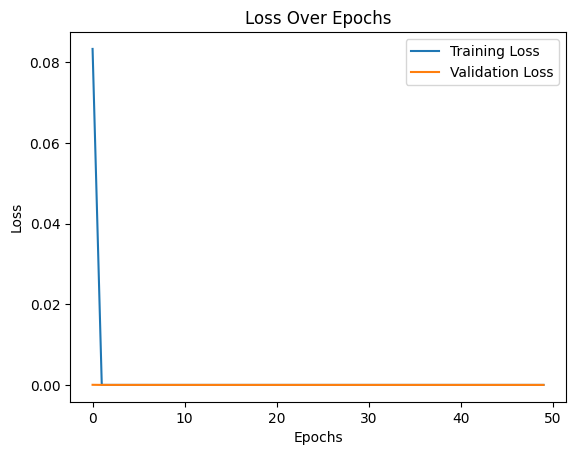

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()